<a href="https://colab.research.google.com/github/GuilleFerru/HCySPD/blob/master/Ferrucci_Guillermo_M1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Solución simbólica en un circuito RLC

Se resuelve la ecuacion diferencial del circuito RLC de la figura.

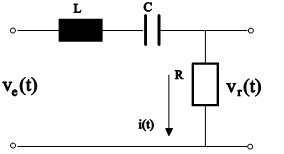

Las ecuaciones son
<!-- $(M+m)\cdot\ddot{\delta} = u- m\cdot long \cdot \ddot{\phi} + m\cdot long \cdot \dot{\phi}^2 \cdot \phi -Fricc\cdot \dot{\delta}$,
$Long \cdot \ddot{\phi} = g \cdot \phi - \ddot{\delta}$ -->
$\begin{equation*}
\begin{cases}
\frac{di(t)}{dt}=-\frac{R}{L}i(t)-\frac{1}{L}v_c(t) + \frac{1}{L}v_e(t)  \\
\frac{dv_c(t)}{dt}=\frac{1}{C}i(t)
\end{cases}
\end{equation*} \tag*{}$

con las condiciones iniciales nulas para la corriente $i(0)=0$ y la tensión del capacitor $v_c(0)=0$.

## Instalación de Octave en el entorno Colab
Se instala el programa Octave, y las librerías necesarias.

In [ ]:
!apt install octave #Instala colab en el entorno de trabajo

In [2]:
# !apt-get update #Usar para actualizar librerias, únicamente

In [ ]:
# https://gnu-octave.github.io/packages/
# https://github.com/gnu-octave/symbolic
!apt install octave python3-sympy #Instala el paquete simbólico de Octave, que incluye el Sympy de Python

In [4]:
%%writefile Inst_S.m
pkg install -forge symbolic

Writing Inst_S.m


In [5]:
!octave -W Inst_S.m #  corre el código adentro de Octave pkg install -forge symbolic

For information about changes from previous versions of the symbolic package, run 'news symbolic'.


In [ ]:
!pip install --user sympy==1.5.1 #Normalmente no es necesario, pero ésta versión actual de "octave-symbolic" lo exige

In [7]:
# No anda !pip install --user sympy==1.11 #Normalmente no es necesario, pero ésta versión actual de "octave-symbolic" lo exige

Se debe agregar en el .m el path donde está el Python, mediante una línea como ésta:

---


**setenv PYTHON /usr/local/bin/python**


---


para acceder al sympy desde symbolic. No obtante, puede ser diferente el path y debe verificarse en caso de que no funcione.


In [8]:
%%writefile Calculo_RLC_Simbolico.m
clear all; clc;
setenv PYTHON /usr/local/bin/python %Acá está el vinculo con Pyton, para acceder al sympy desde symbolic
%/usr/bin/python
pkg load symbolic %Primera vez que se corre el paquete simbólico de Python.
% #R=2.2e3;L=10e-6;C=100e-9;
syms ii(t) v(t)
ode2=diff(v)==ii;
% ode1=diff(ii)==-R/L*ii-1/L*v+1/L*heaviside(0);
ode1=diff(ii)==-ii-v+heaviside(0,1);%heaviside(0) devuelve .5
cond1 = ii(0) == 0;
cond2 = v(0) == 0;
conds = [cond1;cond2];
odes = [ode1; ode2];
Sol=dsolve(odes,ii(0) == .0,v(0) == .0);
Corriente=simplify(Sol.ii)
Tension=simplify(Sol.v)

Writing Calculo_RLC_Simbolico.m


Luego de generar el archivo .m en el entorno, se puede ejecutar al Octave con los comandos de línea.

In [9]:
!octave -W Calculo_RLC_Simbolico.m # -W : no window system

Symbolic pkg v3.1.1: Python communication link active, SymPy v1.5.1.
Corriente = (sym)

        -t           
        ───          
         2     ⎛√3⋅t⎞
  2⋅√3⋅ℯ   ⋅sin⎜────⎟
               ⎝ 2  ⎠
  ───────────────────
           3         

Tension = (sym)

            -t               
            ───              
             2     ⎛√3⋅t   π⎞
      2⋅√3⋅ℯ   ⋅sin⎜──── + ─⎟
                   ⎝ 2     3⎠
  1 - ───────────────────────
                 3           




# Verificación numérica

Queda como tarea completar el script siguiente para verificar las soluciones obtenidas analíticamente.

In [ ]:
%%writefile Verificacion_Num.m
clc;clear all;
warning('off','all');
X=-[0; 0];ii=0;t_etapa=1e-8;wRef=2;tF=1e-3;
color_='r';
color='b';
Ts=t_etapa;
%A1=((2*Kp*Ts)+(Ki*(Ts^2))+(2*Kd))/(2*Ts);
%B1=(-2*Kp*Ts+Ki*(Ts^2)-4*Kd)/(2*Ts);
%C1=Kd/Ts;
%e=zeros(round(tF/t_etapa),1);
u=0;TL=1.15e-4;u=12;
%graphics_toolkit("gnuplot"); %No aconsejado
%graphics_toolkit("fltk");
%graphics_toolkit("qt"); %Aconsejado
% x1(1)=X(1);%corriente
% x2(2)=X(2);%tensión en el capacitor
for t=0:t_etapa:tF
  ii=ii+1;k=ii+2;
  x1(ii)=X(1);%corriente
  x2(ii)=X(2);%tensión en el capacitor
  X=modrlc(t_etapa, X, u);
  acc(ii)=u;
end
t=0:t_etapa:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(3,1,1);hold on;
plot(t,x1,color_);title('x_1 corriente'); hold on;
%plot(t,x1_analitica,color);title('x_1 corriente'); hold on;
subplot(3,1,2);hold on;
plot(t,x2,color_);title('x_2 Vc_t');
subplot(3,1,3);hold on;
plot(t,acc,color_);title('Entrada u_t, v_a');
xlabel('Tiempo [Seg.]');
%figure(1)
%figure(2)
print(hfig1,'Vars_temporal','-r300','-dpng');
save('Verificacion_Num_1.mat','-v7');

In [11]:
%%writefile modrlc.m
%Funcion modelo
function [X]=modrlc(t_etapa, xant, accion)
h=1e-9;t_simul=1e-3;R=2.2e3;L=10e-6;C=100e-9;
A=[-R/L, -1/L;1/C,0];B=[1/L;0];%
% eig(A)
% 1./ans
C=[R 0];u=accion;
x=xant;
for ii=1:t_etapa/h
xp=A*x+B*u;
x=x+xp*h;
end
X=[x];%x1 corriente, x2 tensión

Writing modrlc.m


In [12]:
# -W : no window system
!octave -W Verificacion_Num.m
import scipy.io
mat = scipy.io.loadmat('/content/Verificacion_Num_1.mat')

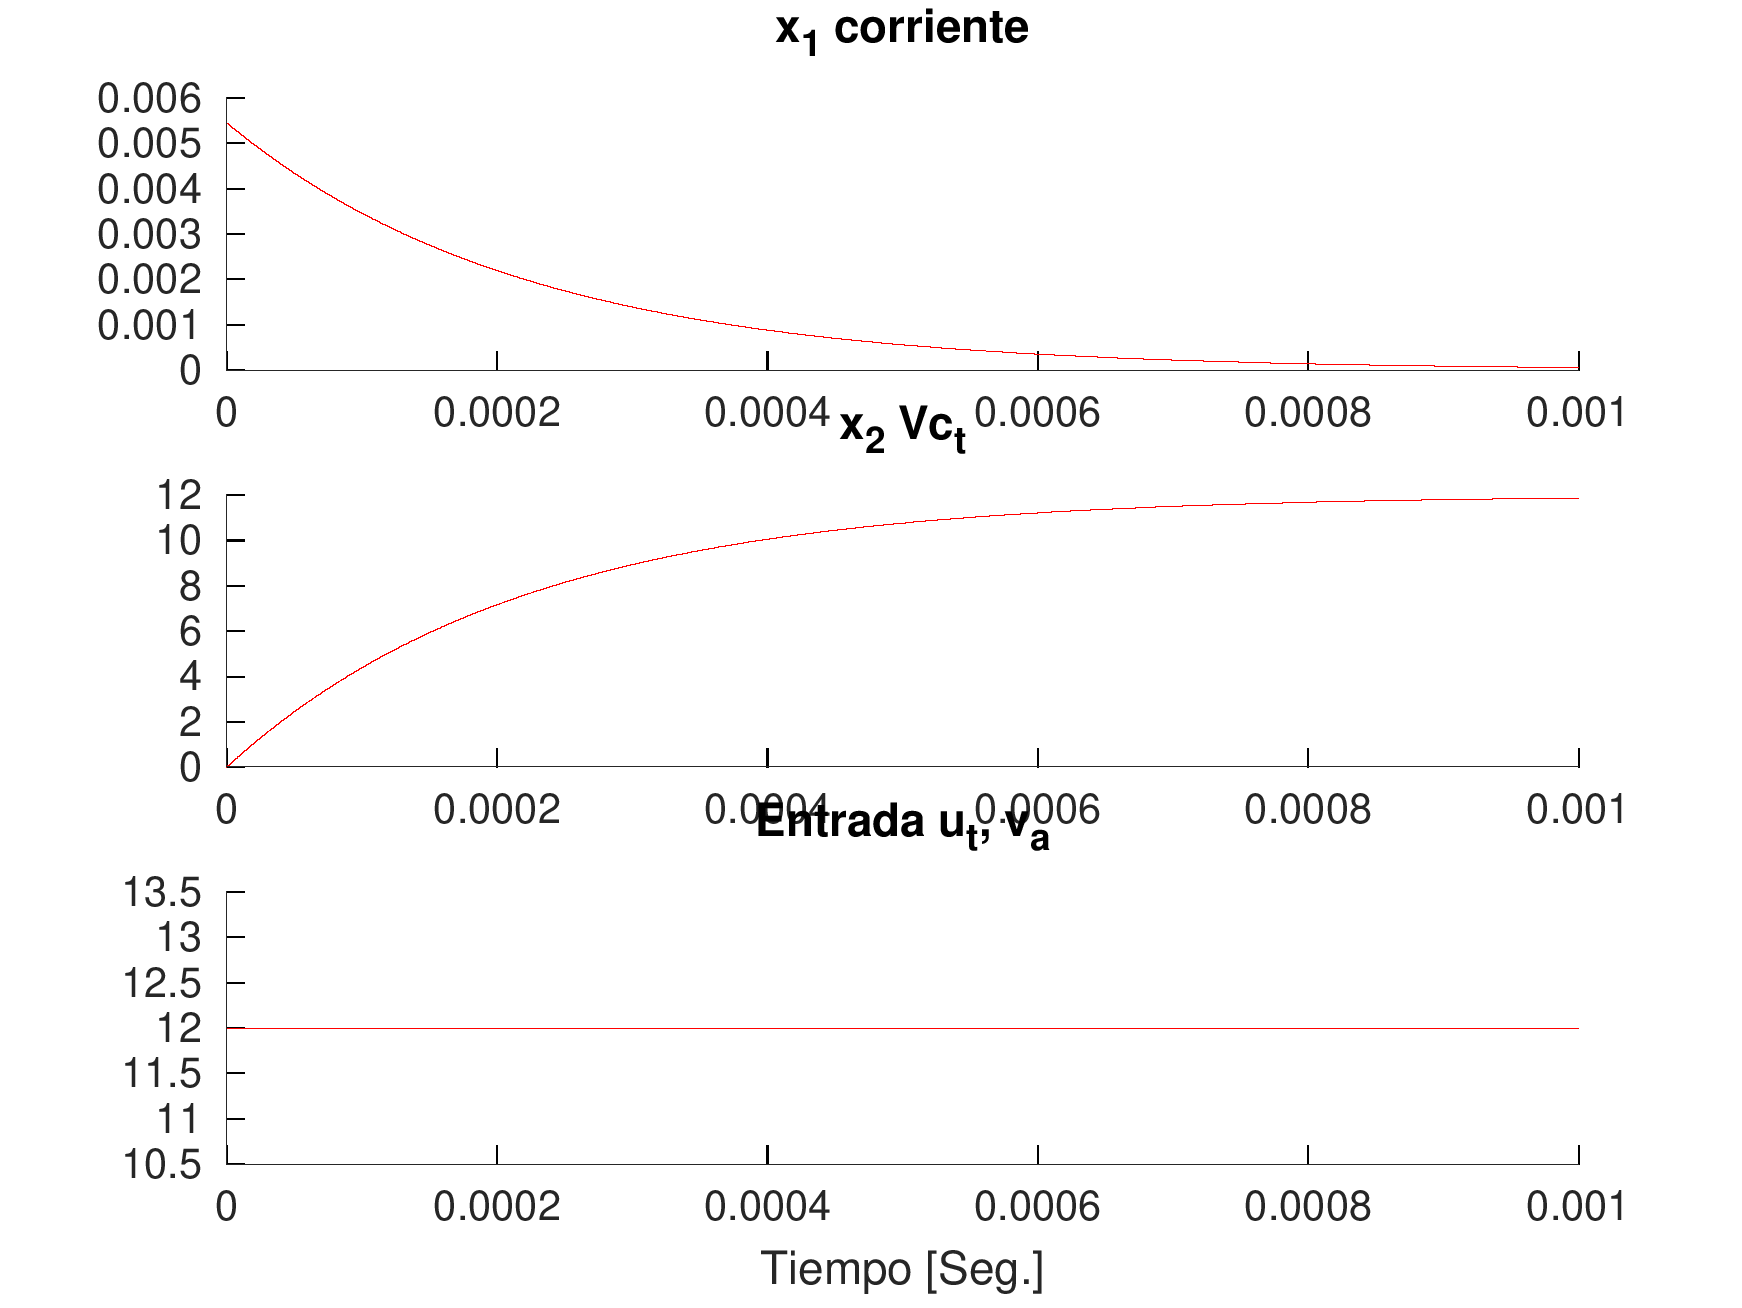

In [13]:
from PIL import Image
imt = Image.open("/content/Vars_temporal.png")
imt

In [14]:
from google.colab import drive #ésto es para guardar los resultados en el Gdrive.
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
# !cp Vars_temporal.png /content/drive/MyDrive/CursoHCSPD2024 #Copia uno por uno
import os
import shutil
fnames = ['Vars_temporal.png','Calculo_RLC_Simbolico.m','Verificacion_Num.m','Verificacion_Num_1.mat','modrlc.m'] #Acá van los nombres de los archivos que desean copiarse al Gdrive
for fname in fnames:
  src = os.path.join('/content', fname)
  dst = os.path.join('/content/drive/MyDrive/CursoHCSPD2024', fname)
  shutil.copyfile(src, dst)

# Simulación numérica del avión
Se realiza la simulación por Euler del modelo simplificado del avión
$\dot{\alpha}=a\cdot (\phi-\alpha)$, $\ddot \phi=-\omega^2\cdot(\phi-\alpha-b\cdot u_t)$, $\dot h=c\cdot \alpha.$

In [17]:
%%writefile Avion_Num.m
clc;clear all;
warning('off','all');
X=-[0; 0;0;0];t_etapa=10e-3;
tF=5;
color_='r';
color='b';
Ts=t_etapa;
u=1;
ii=0;
for t=0:t_etapa:tF
  ii=ii+1;
  x2(ii)=X(2);%Ángulo fi
  x4(ii)=X(4);%tensión en el capacitor
  X=modavion(t_etapa, X, u);
  acc(ii)=u;
end
t=0:t_etapa:tF;
hfig1 = figure(1); set(hfig1, 'Visible', 'off');
subplot(3,1,1);hold on;
plot(t,x2,color_);title('x_2 angulo fi'); hold on;
%plot(t,x1_analitica,color);title('x_1 corriente'); hold on;
subplot(3,1,2);hold on;
plot(t,x4,color_);title('x_4 Altura');
subplot(3,1,3);hold on;
plot(t,acc,color_);title('Entrada u_t, v_a');
xlabel('Tiempo [Seg.]');
%figure(1)
%figure(2)
print(hfig1,'VarsAvion_temporal','-r300','-dpng');
save('Verificacion_Num_1Avion.mat','-v7');

Writing Avion_Num.m


In [18]:
%%writefile modavion.m
%Funcion modelo
function [X]=modavion(t_etapa, xant, accion)
%xant=[alfa,fi,fi_p,h]
a=0.01; b=2; c=100;
omega=0.2;
At=1e-3;
u=accion;
%xant=[alfa,fi,fi_p,h]
alfa=xant(1);
fi=xant(2);
fi_p=xant(3);
h=xant(4);
x=xant;
for ii=1:t_etapa/At
  %xp=A*x+B*u;
  alfa_p=a*(fi-alfa);
  fi_pp=(-omega^2)*(fi-alfa-b*u);
  h_p=c*alfa;
  xp=[alfa_p;fi_p;fi_pp;h_p];
  x=x+xp*At;
  fi_p=xp(2);
  alfa=x(1);
  fi=x(2);
  fi_p=x(3);
  h=x(4);
end
X=[x]; %

Writing modavion.m


In [19]:
# -W : no window system
!octave -W Avion_Num.m
# import scipy.io
# mat = scipy.io.loadmat('/content/Verificacion_Num_1.mat')

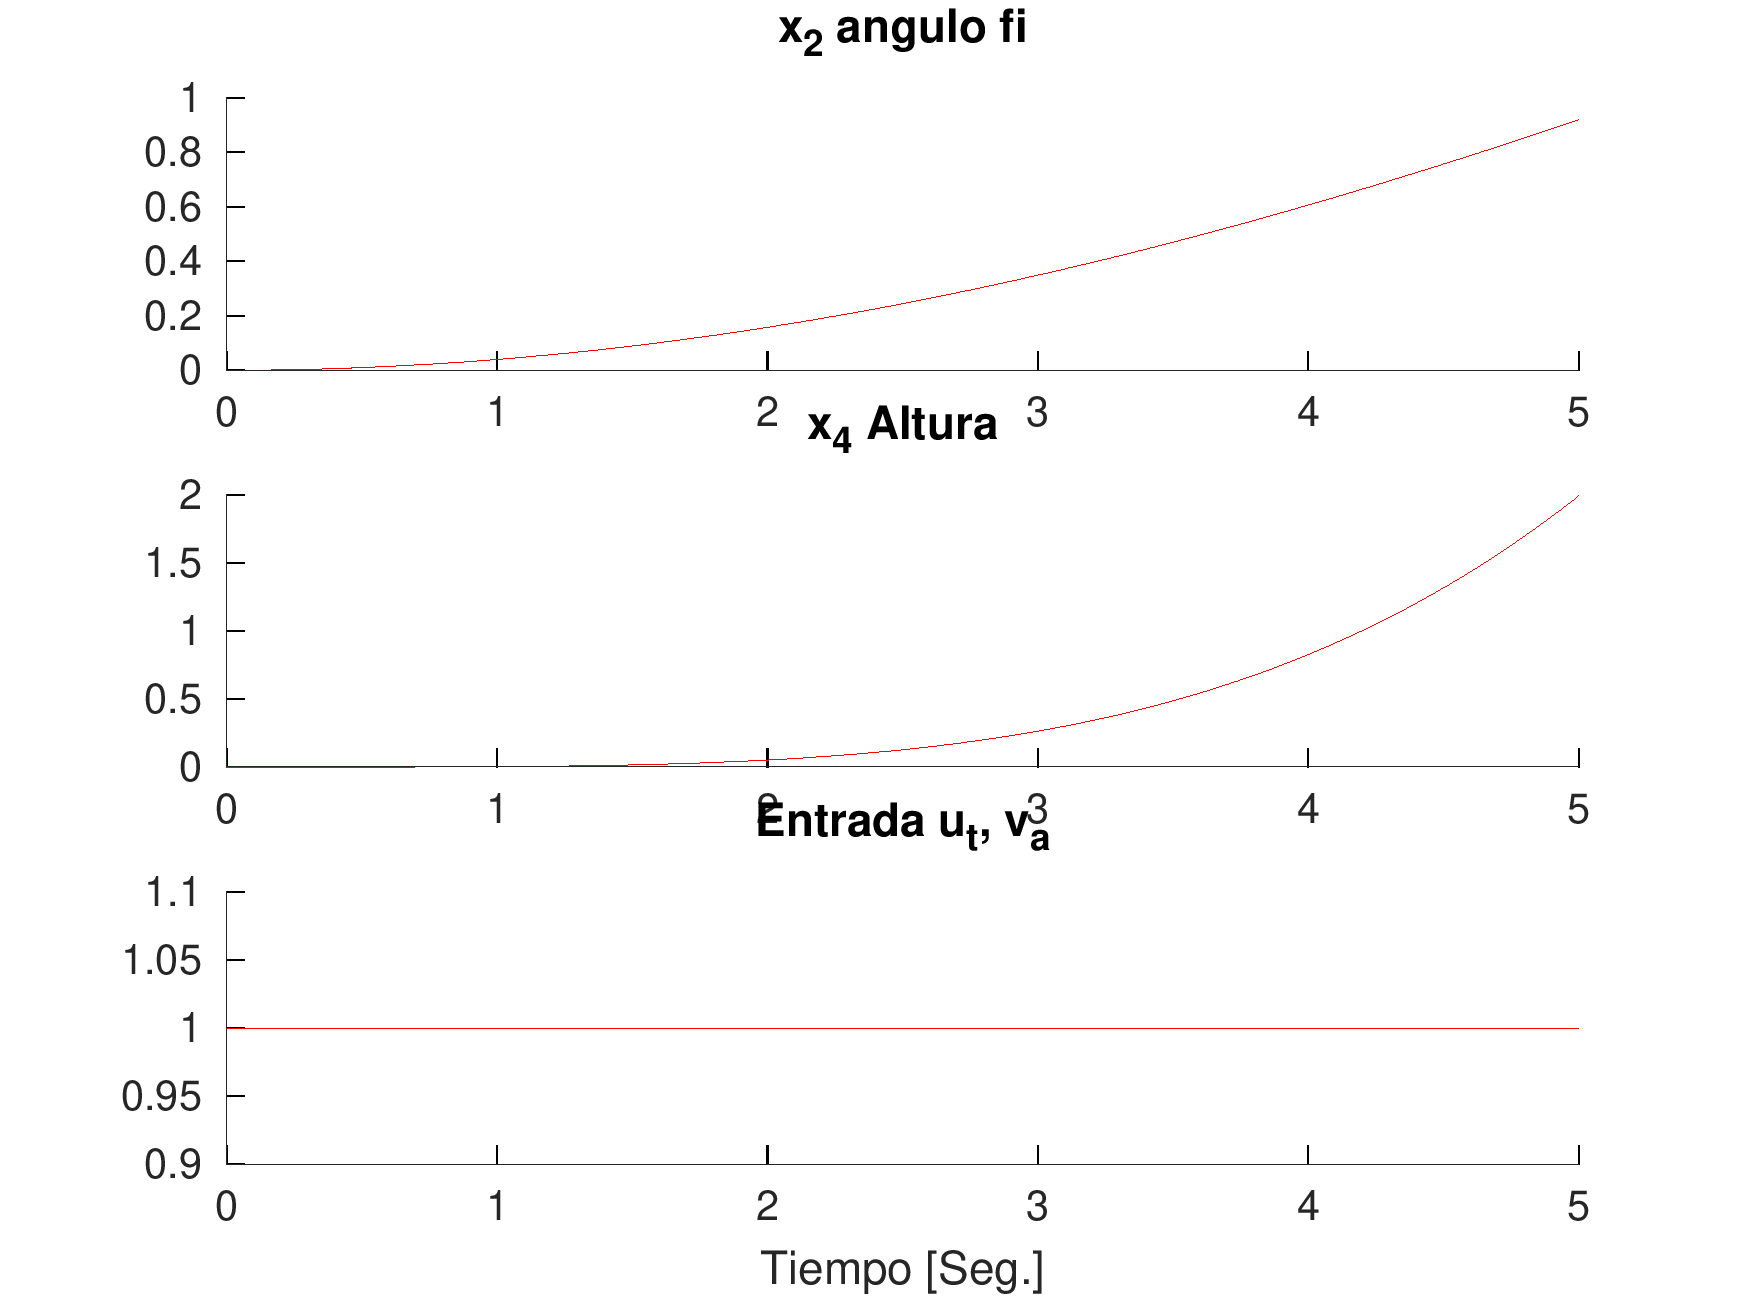

In [20]:
from PIL import Image
imt = Image.open("/content/VarsAvion_temporal.png")
imt

# Cierre
Para guardar todos los archivos y las imágenes generadas en el Gdrive, se puede proceder mediante el montado en el entorno de trabajo, y luego copiar todo mediante Python. Con la instrucción de Linux `!cp archivo dir_destino` se puede copiar uno por uno todos los archivos.

In [21]:
from google.colab import drive #ésto es para guardar los resultados en el Gdrive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# !cp Vars_temporal.png /content/drive/MyDrive/CursoHCSPD2024 #Copia uno por uno
import os
import shutil
fnames = ['VarsAvion_temporal.png','Verificacion_Num_1Avion.mat','Avion_Num.m','modavion.m'] #Acá van los nombres de los archivos que desean copiarse al Gdrive
for fname in fnames:
  src = os.path.join('/content', fname)
  dst = os.path.join('/content/drive/MyDrive/CursoHCSPD2024', fname)
  shutil.copyfile(src, dst)

# 2 - RESUMEN DE LAS LECCIONES APRENDIDAS

1 - Herramientas para trabajo colaborativo en simulación de procesos dinámicos son las siguientes:

1. Colaboración en línea: Las herramientas como Colab de Google permiten a los equipos colaborar en tiempo real en la escritura y ejecución de código, lo que facilita la colaboración y la comunicación entre los miembros del equipo.

2. Integración con GitHub: GitHub es una plataforma de desarrollo colaborativo que permite almacenar y compartir código y rastrear los cambios de diferentes miembros del equipo. Integrar Colab con GitHub permite almacenar y compartir fácilmente el código y los resultados de la simulación.

3. Uso de Jupyter Notebooks: Los Jupyter Notebooks, como los que se utilizan en Colab, son útiles para escribir y ejecutar código de forma interactiva, lo que facilita la exploración de datos y la experimentación con diferentes algoritmos y modelos.

4. Manipulación de datos: Colab permite cargar y trabajar con archivos de Excel, lo que es útil para la manipulación de datos en simulaciones de procesos dinámicos. Esto facilita la entrada de datos y la preparación de estos para su posterior análisis y modelado.

5. Seguimiento de cambios: GitHub proporciona un registro de los cambios realizados en el código a lo largo del tiempo, lo que facilita la colaboración y la gestión de versiones del proyecto. Esto es especialmente útil en proyectos colaborativos donde múltiples personas contribuyen al desarrollo del código.

En conjunto, estas lecciones destacan la importancia de utilizar herramientas colaborativas en línea, como Colab y GitHub, para facilitar el trabajo en equipo y mejorar la eficiencia en la simulación de procesos dinámicos. La integración de estas herramientas permite a los equipos colaborar de manera efectiva, realizar un seguimiento de los cambios y compartir fácilmente el código y los resultados de la simulación.



2 - Solución de ecuaciones numéricas:  

El cálculo numérico es esencial para simular procesos dinámicos y entender el comportamiento de sistemas representados por ecuaciones diferenciales. Se analizan EDO que pueden aproximarse mediante ecuaciones diferenciales ordinarias. La solución de estas EDO es el objeto de estudio inicial, especialmente en sistemas de control. Se introduce el método de Euler directo para resolver estas ecuaciones, donde se divide el intervalo temporal en partes iguales y se utiliza una aproximación discreta para la integración.

Sin embargo, el método de Euler directo tiene limitaciones, y se mencionan modificaciones como el método de Euler regresivo y el método del punto medio (que conduce a la familia de métodos Runge-Kutta) para mejorar el rendimiento en ciertos casos.

También se aborda la simulación de sistemas lineales utilizando la integración de Euler, como en el caso de un motor de corriente continua (CC). Se detalla cómo discretizar el tiempo según las constantes de tiempo involucradas y cómo adaptar el tiempo de muestreo para agilizar la simulación sin perder detalle en las dinámicas rápidas.

En resumen, se explora el uso de métodos numéricos como el método de Euler y sus variantes para resolver EDO en sistemas dinámicos, así como la aplicación de la integración de Euler en la simulación de sistemas lineales como motores de CC.



3 - Solución analítica de ecuaciones diferenciales ordinarias:

Se centra en obtener la evolución temporal de la corriente en un circuito RLC en respuesta a una entrada escalón de tensión. Se emplean herramientas como WolframAlpha, Octave y Python para calcular la solución analítica de las ecuaciones diferenciales que describen el sistema. En Octave, se utiliza un script para calcular la solución simbólica de las ecuaciones diferencias, mientras que en Python se emplea la biblioteca sympy para realizar el cálculo simbólico. El objetivo es obtener la expresión simbólica de la corriente y la tensión en función del tiempo, permitiendo así estudiar el comportamiento del sistema eléctrico RLC de manera analítica.



4 - Herramientas de visualización:

1. FreeMat: Aunque es una opción de código abierto, es menos potente en simulaciones numéricas en comparación con Octave. La visualización de los resultados puede ser menos elegante pero precisa.

2. Octave: Es una herramienta intuitiva para simular procesos dinámicos. Proporciona gráficas elegantes y claras, especialmente con la adición de paquetes como `gnuplot`. Sin embargo, su uso ha sido desaconsejado a partir de la versión 6.0 en favor de otros paquetes como `fltk` o `qt`.

3. Scilab: Similar a la programación en Matlab, es una opción de código abierto con capacidad para realizar gráficas elegantes. Se requiere un conocimiento adecuado de sus funciones y de LaTeX para obtener resultados satisfactorios.

4. Python: Ampliamente utilizado para simulaciones de procesos dinámicos, Python permite realizar gráficas utilizando bibliotecas como `matplotlib`. Aunque la sintaxis puede ser diferente, ofrece un rendimiento rápido y una amplia comunidad de soporte.

5. R: Este programa es útil para simulaciones de procesos dinámicos, especialmente en el ámbito de aprendizaje automático e inteligencia artificial. Tiene una variedad de paquetes de visualización y ofrece una forma eficiente de trabajar con datos y generar gráficos.

La elección de la herramienta de visualización depende de las necesidades específicas del proyecto, de las preferencias individuales y del nivel de experiencia del usuario con cada herramienta mencionada.


5 - Instructivo Symbolic en Octave:

Un instructivo detallado sobre cómo utilizar herramientas simbólicas en Octave, específicamente empleando el paquete Octsympy que utiliza Python y SymPy para manipulación simbólica. El proceso se divide en dos partes: instalaciones y configuraciones.

En la sección de instalaciones, se describe la necesidad de instalar Python y su paquete simbólico, sympy, así como mpmath para Windows. Se proporciona un enlace para descargar Python y se indica cómo instalar sympy y mpmath. Además, se menciona la instalación del paquete simbólico para Octave en Windows utilizando comandos específicos.

En cuanto a las configuraciones, se detalla la importancia de configurar el PATH y el PYTHONPATH para que Octave pueda acceder a las librerías de Python necesarias. Se menciona la necesidad de reiniciar el sistema una vez que se ha configurado el Path correctamente.


6 - Comparación de resultados y ajustes:

Visual Studio con Python 3.6.4: Se menciona que, al comparar los resultados con Visual Studio, se obtienen resultados similares. Se destaca la importancia de usar la versión adecuada de Python para obtener resultados precisos, y se muestra un ejemplo de resultado obtenido en un notebook en la Figura 15.

Comparación de Octave y Colabs (Colaboratory): Se menciona brevemente que se realizó una comparación entre Octave y Colabs, pero no se proporcionan detalles específicos sobre las diferencias encontradas.

Comparación con Matlab: Se sugiere que los resultados obtenidos son similares a los obtenidos con Matlab, aunque no se especifica qué tipo de resultados se están comparando.


Empleando Jupyter: Se menciona que también se empleó Jupyter, pero no se proporciona información detallada sobre los resultados obtenidos o las diferencias encontradas en comparación con otras herramientas.   

En general, se destaca que pueden existir diferencias en los resultados debido a las versiones de los programas utilizados, pero se enfatiza la importancia de verificar siempre el resultado correcto mediante la elección adecuada de las herramientas y la interpretación cuidadosa de los resultados obtenidos.